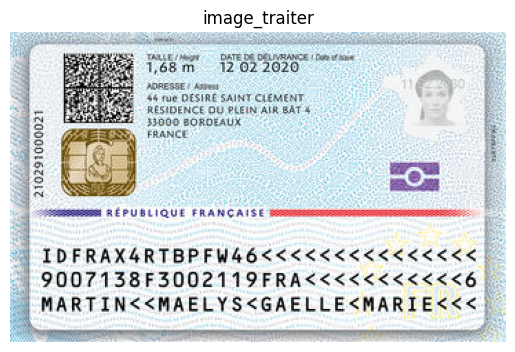

image standardisée : image_traiter.jpg


In [ ]:
import cv2
from matplotlib import pyplot as plt

# Charger l'image
input_image_path = "cni-verso_large.jpg"
image = cv2.imread(input_image_path)

# Étape 1: Redimensionnement
# Dimension cible : 225x360 pixels
target_dimensions = (360, 225)  # largeur x hauteur
resized_image = cv2.resize(image, target_dimensions, interpolation=cv2.INTER_AREA)

# Étape 2: Correction des couleurs
# Conversion en espace BGR pour vérifier les ajustements
corrected_image = cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB)

# Étape 3: Sauvegarde du résultat
output_image_path = "image_traiter.jpg"
cv2.imwrite(output_image_path, resized_image)

# Afficher l'image traitée pour validation
plt.imshow(corrected_image)
plt.axis("off")
plt.title("image_traiter")
plt.show()

# Impression du chemin où l'image est sauvegardée
print(f"image standardisée : {output_image_path}")



array([[[205, 220, 243],
        [199, 221, 242],
        [189, 225, 239],
        ...,
        [162, 184, 197],
        [214, 255, 255],
        [238, 247, 255]],

       [[165, 211, 224],
        [190, 226, 242],
        [195, 216, 235],
        ...,
        [210, 234, 246],
        [194, 211, 221],
        [198, 218, 225]],

       [[218, 222, 249],
        [208, 226, 248],
        [223, 255, 255],
        ...,
        [216, 243, 254],
        [224, 217, 235],
        [201, 230, 234]],

       ...,

       [[223, 255, 255],
        [118, 175, 204],
        [227, 255, 255],
        ...,
        [224, 235, 255],
        [224, 254, 254],
        [202, 253, 236]],

       [[134, 181, 201],
        [219, 255, 255],
        [156, 207, 234],
        ...,
        [207, 217, 229],
        [196, 224, 235],
        [187, 236, 241]],

       [[172, 214, 236],
        [199, 231, 242],
        [153, 209, 236],
        ...,
        [212, 230, 234],
        [194, 232, 253],
        [224, 239, 244]]], dtype=uint8)
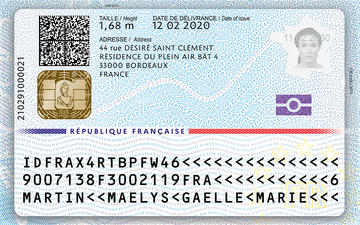

In [ ]:
# Verification de la taille de l'image
corrected_image

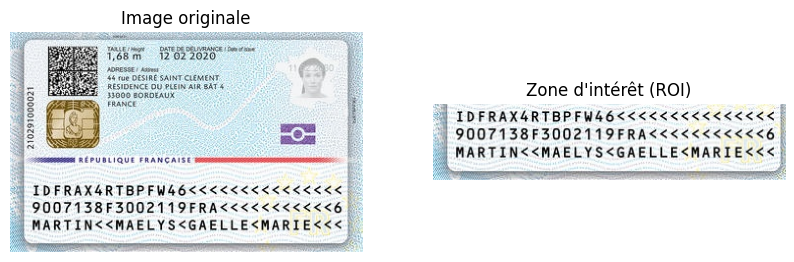

In [ ]:
import cv2
import matplotlib.pyplot as plt

# Charger l'image
image = cv2.imread('image_traiter.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Conversion de BGR (OpenCV) à RGB (affichage Matplotlib)

# Définir une zone d'intérêt (ROI)
x, y, largeur, hauteur = 0, 150, 350, 200  # Coordonnées (x, y) et dimensions (largeur, hauteur)
roi = image[y:y+hauteur, x:x+largeur]  # Extraction de la zone
cv2.imwrite("roi_extraits.png", roi)

# Afficher l'image originale et la ROI
plt.figure(figsize=(10, 5))

# Image originale
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title("Image originale")
plt.axis('off')

# Zone d'intérêt
plt.subplot(1, 2, 2)
plt.imshow(roi)
plt.title("Zone d'intérêt (ROI)")
plt.axis('off')

plt.show()

In [ ]:
!sudo apt install tesseract-ocr
!pip install pytesseract

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr is already the newest version (4.1.1-2.1build1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


In [ ]:
import pytesseract

# Chemin vers l'image
image_path = 'roi_extraits.png'

# Charger l'image
image = cv2.imread(image_path)

#Convertir en niveaux de gris
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# prétraitement (pour améliorer l'OCR)
# gray = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]

# Extraction du texte avec Tesseract
custom_config = r'--oem 3 --psm 6'  #  reconnaissance précise plus segmentation par paragraph avec moteur (lstm(RNN)+ legagy)
text = pytesseract.image_to_string(gray, config=custom_config)


array([[250, 225, 172, ..., 188, 201, 209],
       [237, 249, 201, ..., 199, 197, 186],
       [198, 245, 215, ..., 198, 189, 224],
       ...,
       [251, 170, 250, ..., 218, 236, 251],
       [178, 250, 206, ..., 236, 214, 227],
       [214, 233, 206, ..., 251, 224, 232]], dtype=uint8)
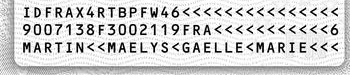

In [ ]:
gray

In [ ]:
print("Texte extrait :")
print(text)

Texte extrait :
| IDFRAX4RTBPFW46<<<<<<<<<<<<<c<
| 9007138F3002119FRA<<<<K<xx<xx<6
| MARTIN<<MAELYS<GAELLE<MARIE<<<_



In [ ]:
def analyser_mrz_depuis_texte(texte):
    """
    Paramètres :
    texte (str) : MRZ sous forme de chaîne de caractères.

    Retourne :
    dict : Un dictionnaire contenant les informations nettoyées.
    """
    # Nettoyage des caractères
    texte = texte.replace('|', '').replace('\n', ' ').strip()
    lignes = [ligne.strip() for ligne in texte.split(' ') if ligne.strip()]

    # Vérification que nous avons 3 lignes après nettoyage (pour distinguer les anciennes des nouvelles versions)
    if len(lignes) < 3:
        raise ValueError("Le texte MRZ doit contenir au moins 3 lignes après nettoyage.")

    # Première ligne
    ligne1 = lignes[0].replace('<', '')
    code_document = ligne1[:2]  # Type de document
    pays_emetteur = ligne1[2:5]  # Pays émetteur
    numero_document = ligne1[5:14].strip('<')  # Numéro de document

    # Deuxième ligne
    ligne2 = lignes[1].replace('<', '')
    date_naissance = ligne2[:6]  # Date de naissance (format AA/MM/JJ)
    chiffre_controle_naissance = ligne2[6]  # Chiffre de contrôle de la date de naissance
    sexe = ligne2[7]  # Sexe (M/F)
    date_expiration = ligne2[8:14]  # Date d'expiration (format AA/MM/JJ)
    chiffre_controle_expiration = ligne2[14]  # Chiffre de contrôle de la date d'expiration
    nationalite = ligne2[15:18]  # Nationalité

    # Troisième ligne (nom complet)
    ligne3 = lignes[2].replace('<', ' ').strip()
    noms = ligne3.split(' ')
    nom_de_famille = noms[0]  # Nom de famille
    prenoms = ' '.join(noms[1:])  # Prénom(s)

    return {
        "Code du Document": code_document,
        "Pays Émetteur": pays_emetteur,
        "Numéro de Document": numero_document,
        "Date de Naissance": date_naissance,
        "Chiffre de Contrôle de Naissance": chiffre_controle_naissance,
        "Sexe": sexe,
        "Date d'Expiration": date_expiration,
        "Chiffre de Contrôle d'Expiration": chiffre_controle_expiration,
        "Nationalité": nationalite,
        "Nom de Famille": nom_de_famille,
        "Prénom(s)": prenoms,
    }

In [ ]:
# Analyse du MRZ
data = analyser_mrz_depuis_texte(text)
for key, value in data.items():
    print(f"{key}: {value}")

Code du Document: ID
Pays Émetteur: FRA
Numéro de Document: X4RTBPFW4
Date de Naissance: 900713
Chiffre de Contrôle de Naissance: 8
Sexe: F
Date d'Expiration: 300211
Chiffre de Contrôle d'Expiration: 9
Nationalité: FRA
Nom de Famille: MARTIN
Prénom(s):  MAELYS GAELLE MARIE   _
